In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

In [4]:
TRAINING_DIR = "/content/fire-detection/Datasets 1-2/Training"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
																			rotation_range=30,
																			height_shift_range=0.2,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/fire-detection/Datasets 1-2/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size = 64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size= 16
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [5]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
!pip install pyyaml h5py
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.8.0


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 15
    #callbacks=[callbacks]
)

Epoch 1/30
15/15 [==============================] - 117s 7s/step - loss: 0.5222 - acc: 0.7205 - val_loss: 0.3764 - val_acc: 0.8703
Epoch 2/30
15/15 [==============================] - 107s 7s/step - loss: 0.3307 - acc: 0.8614 - val_loss: 0.2857 - val_acc: 0.8954
Epoch 3/30
15/15 [==============================] - 106s 7s/step - loss: 0.2972 - acc: 0.8843 - val_loss: 0.2544 - val_acc: 0.8996
Epoch 4/30
15/15 [==============================] - 107s 7s/step - loss: 0.2572 - acc: 0.8985 - val_loss: 0.2146 - val_acc: 0.9331
Epoch 5/30
15/15 [==============================] - 105s 7s/step - loss: 0.2193 - acc: 0.9192 - val_loss: 0.2621 - val_acc: 0.9205
Epoch 6/30
15/15 [==============================] - 106s 7s/step - loss: 0.2130 - acc: 0.9236 - val_loss: 0.2173 - val_acc: 0.9414
Epoch 7/30
15/15 [==============================] - 108s 7s/step - loss: 0.2079 - acc: 0.9312 - val_loss: 0.1935 - val_acc: 0.9414
Epoch 8/30
15/15 [==============================] - 106s 7s/step - loss: 0.1826 - a

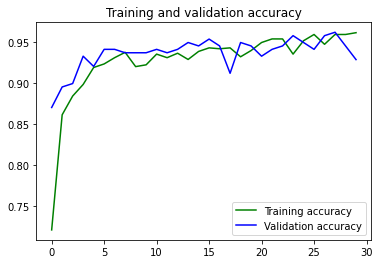

<Figure size 432x288 with 0 Axes>

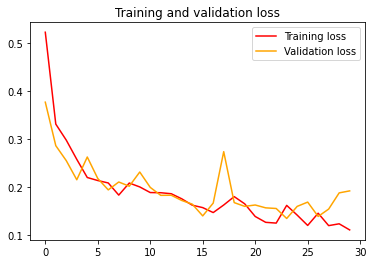

<Figure size 432x288 with 0 Axes>

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()


In [9]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [10]:
!ls saved_model/my_model

assets	keras_metadata.pb  saved_model.pb  variables


In [11]:
new_model = tf.keras.models.load_model('saved_model/my_model')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')
new_model.summary()

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = new_model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving istockphoto-1281783803-612x612.jpg to istockphoto-1281783803-612x612 (1).jpg
False 0.96395653


In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = new_model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving NYC-Office-Fire.png to NYC-Office-Fire (1).png
True 0.9980071


Creating customized InceptionV3 model

In [31]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "/content/fire-detection/Dataset 3/Train"

training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/fire-detection/Dataset 3/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)
#Creating customized InceptionV3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# adding a global spatial average pooling layer to the model fo the base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()
history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/30
14/14 [==============================] - 228s 16s/step - loss: 0.1344 - acc: 0.9593 - val_loss: 1.9334 - val_acc: 0.6173
Epoch 2/30
14/14 [==============================] - 218s 15s/step - loss: 0.2366 - acc: 0.9492 - val_loss: 0.2761 - val_acc: 0.9388
Epoch 3/30
14/14 [==============================] - 218s 16s/step - loss: 0.0558 - acc: 0.9797 - val_loss: 0.1351 - val_acc: 0.9643
Epoch 4/30
14/14 [==============================] - 218s 15s/step - loss: 0.0864 - acc: 0.9713 - val_loss: 0.2447 - val_acc: 0.9388
Epoch 5/30
14/14 [==============================] - 218s 16s/step - loss: 0.0978 - acc: 0.9797 - val_loss: 0.6599 - val_acc: 0.7500
Epoch 6/30
14/14 [==============================] - 219s 17s/step - loss: 0.0577 - acc: 0.9755 - val_loss: 0.1269 - val_acc: 0.9745
Epoch 7/30
14/14 [==============================] - 217s 15s/step - loss: 0.1152 - acc: 0.9599 - val_loss: 0.0807 - val_acc: 0.9643
Epoch 8/30
14/14 [==============================] - 217s 15s/step - loss: 0.

In [28]:
for layer in model.layers[:249]:
  layer.trainable = False
for layer in model.layers[249:]:
  layer.trainable = True

In [29]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
14/14 [==============================] - 285s 20s/step - loss: 0.5704 - acc: 0.7488 - val_loss: 0.1007 - val_acc: 0.9694
Epoch 2/30
14/14 [==============================] - 277s 21s/step - loss: 0.3997 - acc: 0.8152 - val_loss: 0.1003 - val_acc: 0.9694
Epoch 3/30
14/14 [==============================] - 278s 21s/step - loss: 0.2747 - acc: 0.8738 - val_loss: 0.1020 - val_acc: 0.9745
Epoch 4/30
14/14 [==============================] - 276s 20s/step - loss: 0.2073 - acc: 0.9031 - val_loss: 0.1036 - val_acc: 0.9694
Epoch 5/30
14/14 [==============================] - 276s 20s/step - loss: 0.1928 - acc: 0.9199 - val_loss: 0.1047 - val_acc: 0.9694
Epoch 6/30
14/14 [==============================] - 276s 20s/step - loss: 0.1465 - acc: 0.9378 - val_loss: 0.1054 - val_acc: 0.9643
Epoch 7/30
14/14 [==============================] - 276s 20s/step - loss: 0.1299 - acc: 0.9462 - val_loss: 0.1050 - val_acc: 0.9592
Epoch 8/30
14/14 [==============================] - 275s 20s/step - loss: 0.

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving NYC-Office-Fire.png to NYC-Office-Fire (3).png
True 0.6093388


In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)/255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving 1_HxIt2kyBhOoGmC_-FR-yiw.jpg to 1_HxIt2kyBhOoGmC_-FR-yiw (1).jpg
False 0.54263276


In [ ]:
!mkdir -p saved_model
model.save('saved_model/InceptionV3')

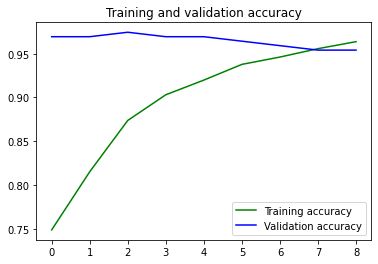

<Figure size 432x288 with 0 Axes>

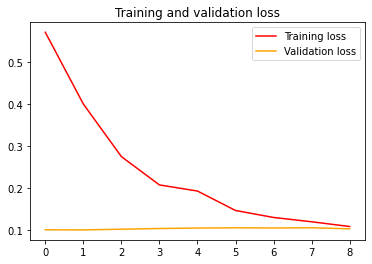

<Figure size 432x288 with 0 Axes>

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()